# Required Libraries

In [61]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Datset

In [62]:

# Load the dataset
twitter_data = pd.read_csv("twitter_training.csv")



In [63]:
twitter_data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


# Create Column Names

In [65]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
twitter_data = pd.read_csv('twitter_training.csv', names=col_names)
    
twitter_data.head()
     

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Preprocess the Data

In [67]:
# Convert text to lowercase
twitter_data['Content'] = twitter_data['Content'].str.lower()



In [68]:
twitter_data

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,just realized between the windows partition of...


In [69]:
# Remove URLs
#twitter_data['Content'] = twitter_data['Content'].apply(lambda x: re.sub(r'http\S+', '', x))


twitter_data['Content'] = twitter_data['Content'].astype(str)  # Convert column to string type
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: re.sub(r'http\S+', '', str(x)))
twitter_data.sample(20)

,ID,Entity,Sentiment,Content
14861,2945,Dota2,Negative,@dota2 i have once again i'll say it today.......
71355,11022,TomClancysGhostRecon,Positive,"pretty cool concept art, although i am glad we..."
51462,10434,RedDeadRedemption(RDR),Neutral,"so.........wait,horse's arthura poo hahaha . ..."
64592,7865,MaddenNFL,Neutral,madden nfl 20 - playstation 4 ps4 great offer ...
48723,5964,HomeDepot,Neutral,my man hates me so much!! one min i’m seeing t...
66637,7011,johnson&johnson,Positive,if employees understand the reasons behind the...
24345,4575,Google,Neutral,first 15 days
14754,2928,Dota2,Neutral,supports aren’t getting enough love in
1107,2595,Borderlands,Positive,.
39555,5589,Hearthstone,Positive,stream will be back tomorrow. had a nice weeke...


In [70]:
# Remove special characters and punctuation
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
#Random Number of rows
twitter_data.sample(15)

,ID,Entity,Sentiment,Content
17468,9796,PlayStation5(PS5),Neutral,i really wanted to buy someone a ps and k mamb...
62194,5061,GrandTheftAuto(GTA),Negative,so azumanga daioh and his gta vice city has ru...
68268,3691,Cyberpunk2077,Negative,can i please have sex with johnny in this game...
18685,12403,WorldOfCraft,Negative,can we just talk about how damn nasty it is it...
53372,10770,RedDeadRedemption(RDR),Neutral,red dead redeeming boys
68092,3661,Cyberpunk2077,Positive,cyberpunk looks wonderful soooooooo truly good
13275,8679,NBA2K,Neutral,beluba nbak ronniek lr kstauff nbakktv workbem...
58282,11592,TomClancysRainbowSix,Negative,radio rhandlerr give this man a rhandlerr char...
73005,8905,Nvidia,Positive,a hz clock sounds juicy
74550,9179,Nvidia,Neutral,check out this beautiful aorus geforce rtx ma...


In [71]:
# Tokenize text
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: word_tokenize(x))


In [47]:
 #Remove stop words
stop_words = set(stopwords.words('english'))
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: [word for word in x if word not in stop_words])



In [48]:
twitter_data

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,"[im, getting, borderlands, murder]"
1,2401,Borderlands,Positive,"[coming, borders, kill]"
2,2401,Borderlands,Positive,"[im, getting, borderlands, kill]"
3,2401,Borderlands,Positive,"[im, coming, borderlands, murder]"
4,2401,Borderlands,Positive,"[im, getting, borderlands, murder]"
...,...,...,...,...
74677,9200,Nvidia,Positive,"[realized, windows, partition, mac, like, year..."
74678,9200,Nvidia,Positive,"[realized, mac, window, partition, years, behi..."
74679,9200,Nvidia,Positive,"[realized, windows, partition, mac, years, beh..."
74680,9200,Nvidia,Positive,"[realized, windows, partition, mac, like, year..."


In [52]:
# Lemmatize words
lemmatizer = WordNetLemmatizer()
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



In [54]:
# Join tokens back into sentences
twitter_data['Content'] = twitter_data['Content'].apply(lambda x: ' '.join(x))



In [57]:
import matplotlib.pyplot as plt

### Visualize the sentiment using Bar chart

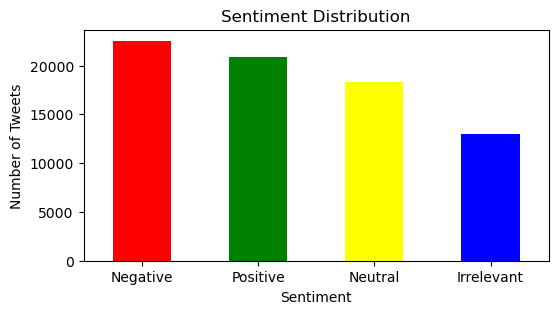

In [58]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts 

plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

### Visualize the sentiment using Pie Chart

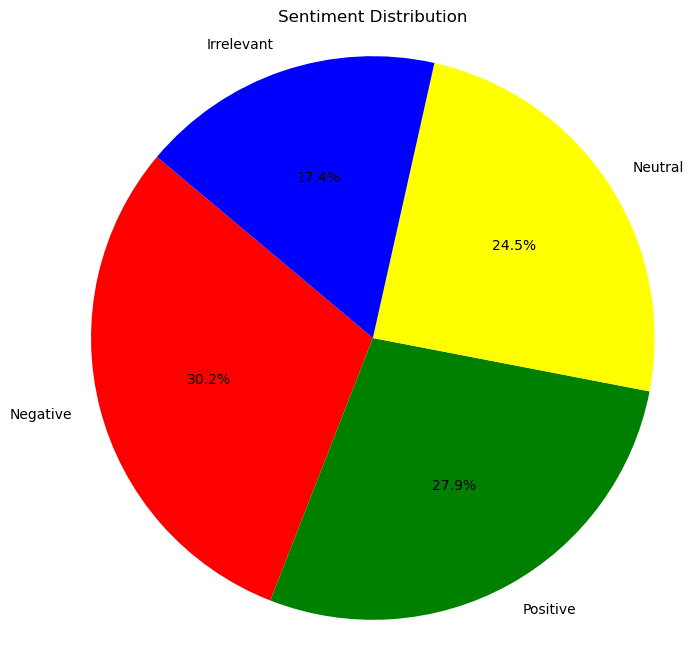

In [60]:

import matplotlib.pyplot as plt

# Assuming sentiment_counts is already calculated
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'yellow', 'blue'])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
